In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

pd.set_option('display.max_colwidth', -1)

In [2]:
fdf = pd.read_excel('February extract.xlsx')
mdf = pd.read_excel('March extract.xlsx')

In [13]:
fdf['m-d'] = fdf['day'].apply(lambda x: '2-' + str(x))
mdf['m-d'] = mdf['day'].apply(lambda x: '3-' + str(x))

In [14]:
df = pd.concat([fdf[['m-d','number','place']], mdf[['m-d','number','place']]])

In [16]:
df.head()

,m-d,number,place
0,2-28,2,UnitedStates
1,2-28,2,Norway
2,2-28,4,UK
3,2-28,233,Italy
4,2-28,4,Sweden


In [17]:
ctb = pd.pivot_table(df, values='number', index='place', columns='m-d').fillna(0)

In [18]:
ctb['total'] = ctb.sum(axis=1)

In [23]:
cols = ['2-4', '2-5', '2-6', '2-7', '2-8', '2-9', '2-10', '2-11', '2-12', '2-13', '2-14', '2-15', 
        '2-16', '2-17', '2-18','2-19', '2-20', '2-21', '2-22', '2-23', '2-24', '2-25', '2-26', 
        '2-27', '2-28', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '3-7', '3-8', '3-9', 
       '3-10', '3-11']

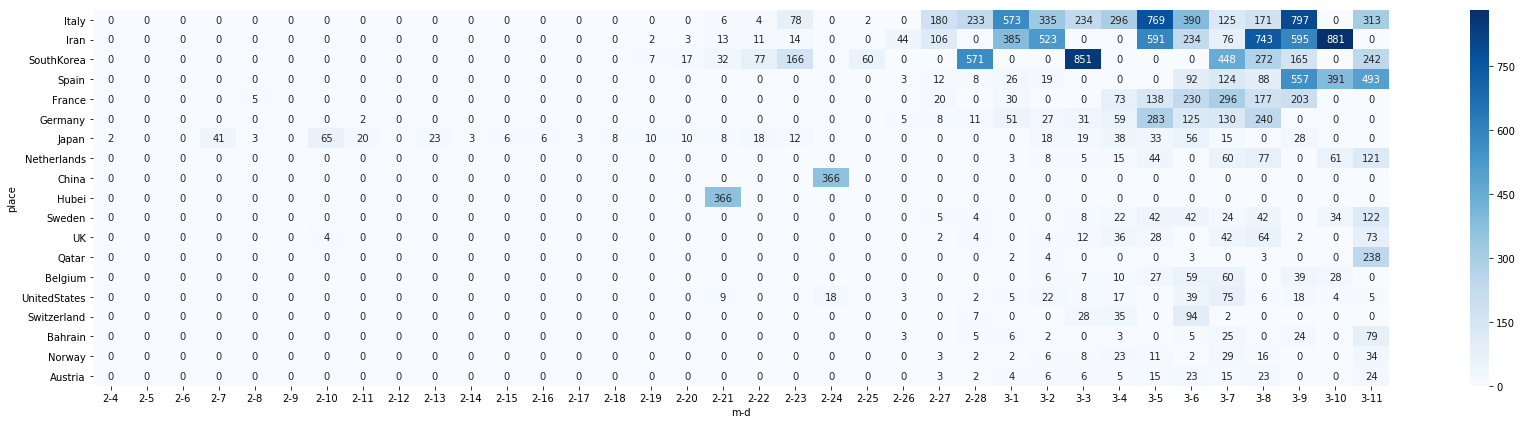

In [29]:
plt.figure(figsize=(24,6))
sns.heatmap(ctb.sort_values('total', 
                        ascending=False).loc[ctb['total']>100,cols], 
            cmap='Blues', annot=True, fmt='.0f')
plt.tight_layout()
plt.savefig('Corona.png')